# Salient N-Grams

In [1]:
import pandas as pd
df = pd.read_csv("./data/mbti-type.zip", compression="zip")
print(df.shape)
df.head()

(8675, 2)


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


### A more automagic approach to n-grams using scikit-learn

In [23]:
# We need to add the types themselves to the stopword list because otherwise they are the 
# most salient features. Because this corpus was gathered from a forum talking about mbti 
# types, this seems like a terrible bias to introduce.

# UPDATE: Also need to remove plural forms because those are apparently also very salient
# but not super useful in exploring salient features!
from nltk.corpus import stopwords as nltk_stopwords

type_stopwords = list(map(lambda x: x.lower(), df.type.unique()))
plural_type_stopwords = [x + "s" for x in type_stopwords]

print(type_stopwords)
print(plural_type_stopwords)
all_stopwords = type_stopwords + plural_type_stopwords + list(nltk_stopwords.words('english'))
print(len(all_stopwords))

['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
['infjs', 'entps', 'intps', 'intjs', 'entjs', 'enfjs', 'infps', 'enfps', 'isfps', 'istps', 'isfjs', 'istjs', 'estps', 'esfps', 'estjs', 'esfjs']
211


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2), # I don't have enough memory to use trigrams with tf-idf
                            stop_words = all_stopwords)

X = vectorizer.fit_transform(df.posts)
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj', 'infjs', 'entps', 'intps', 'intjs', 'entjs', 'enfjs', 'infps', 'enfps', 'isfps', 'istps', 'isfjs', 'istjs', 'estps', 'esfps', 'estjs', 'esfjs', 'i', 'me', 'my',... 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [25]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=5)
dtree.fit(X, df.type)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

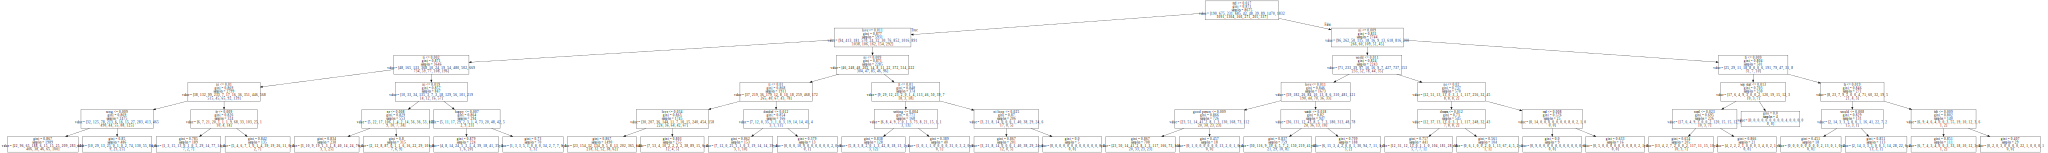

In [26]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names = vectorizer.get_feature_names())
graph = graphviz.Source(dot_data)
graph